In [1]:
import pandas as pd
import numpy as np
import os
import pickle

In [2]:
wkdir= "/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_LINCS/"

data_year = "2020"
cell_name = "BC3C"

data_dir = os.path.join(wkdir,"00_outputs_" + data_year + "_" + cell_name)
# load STV data frame
STVs = pd.read_excel(os.path.join(data_dir, "ALL_DATA_2020_Jing.xlsx"), sheet_name = "STV", index_col = 0)

states = STVs.columns.to_list()
print("States:", states)

States: ['blca_invasiveness', 'blca_oncogenesis', 'blca_survival']


In [3]:
cell_lines=pd.read_excel('/home/jing/Downloads/1-s2.0-S0302283822016785-mmc2.xlsx',
                         sheet_name='Suppl. table 2')

In [4]:
cell_lines.drop(columns='Description',inplace=True)

In [5]:
cell_lines.set_index('GENE',inplace=True)

In [6]:
display(cell_lines)

,HT1376,SCaBER,T24,SV-HUC,94-10,97-1,J82,RT4,TCCSUP,253J,...,VMCUB2,BC3C,BFTC905,KU1919,SD,VMCUB1,97-24,DSH1,JMSU1,RT112
GENE,,,,,,,,,,,,,,,,,,,,,
ACTB,10764.00,12199.90,8714.98,20783.80,8733.32,8628.10,10446.40,7672.91,14989.90,8817.05,...,18859.60,9118.85,9572.72,20973.00,12116.80,24617.90,16192.00,8519.72,13352.50,9290.68
B2M,13398.80,8728.56,11661.80,9262.90,2132.29,2276.01,17958.10,7329.10,10117.10,3179.73,...,3077.87,4198.92,2265.14,5701.33,3621.52,3061.28,2403.99,4859.61,4449.83,4155.86
HLA-A,6532.75,2871.19,2249.83,6736.70,670.96,2144.13,10754.30,1869.38,3690.13,1889.55,...,2982.40,1847.71,1487.66,1552.42,754.29,850.42,582.38,1240.13,888.44,326.48
GNB2L1,2438.67,3771.29,4370.83,6061.66,6144.25,6236.19,2404.66,6418.61,3051.48,5764.55,...,4958.43,6071.53,8481.75,7725.72,5609.70,5613.63,5029.02,1615.17,5467.65,5313.09
TMSB10,2391.47,8766.98,6427.58,5748.85,4793.07,7520.14,4909.37,1487.69,5277.62,10837.10,...,5225.44,3989.49,6506.52,23661.80,10831.20,14329.90,12866.40,2134.04,11156.70,4257.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZSCAN1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ZSCAN10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ZSWIM2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [7]:
cell_lines_log=cell_lines.applymap(np.log1p)

/tmp/ipykernel_1226660/415235936.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cell_lines_log=cell_lines.applymap(np.log1p)


In [8]:
cell_lines_log_t= cell_lines_log.T

In [9]:
cell_lines_log_t

GENE,ACTB,B2M,HLA-A,GNB2L1,TMSB10,FN1,S100A11,ANXA2P2,PFN1,RPL8,...,ZNRF4,ZP2,ZP4,ZPBP,ZPBP2,ZSCAN1,ZSCAN10,ZSWIM2,psiTPTE22,tAKR
HT1376,9.284055,9.502995,8.784736,7.799618,7.780082,4.962495,8.714748,7.468565,7.919709,8.345850,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.0,0.000000,0.000000
SCaBER,9.409265,9.074470,7.962830,8.235438,9.078862,5.590651,8.433849,8.242301,7.820492,8.814977,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.0,0.000000,0.000000
T24,9.072913,9.364160,7.719054,8.382937,8.768509,8.771901,7.628785,8.681554,8.577631,8.336009,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.0,0.000000,0.000000
SV-HUC,9.941977,9.133880,8.815474,8.709904,8.656929,8.624094,8.604829,8.566442,8.558644,8.445289,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.0,0.000000,0.000000
94-10,9.075015,7.665421,6.510199,8.723435,8.475135,3.421980,8.590120,8.126190,7.985420,9.601700,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.0,0.000000,0.000000
97-1,9.062895,7.730618,7.670955,8.738285,8.925473,9.039591,8.727010,7.965431,8.182665,8.945210,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.0,0.000000,0.000000
J82,9.254108,9.795852,9.283154,7.785580,8.499105,5.564022,7.937932,8.143122,8.640218,8.138045,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.0,0.000000,0.000000
RT4,8.945582,8.899744,7.533897,8.767113,7.305652,3.280535,8.431027,8.142287,8.341277,8.953467,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.0,0.000000,0.000000
TCCSUP,9.615199,9.222081,8.213688,8.023710,8.571420,7.023064,8.127183,7.741612,8.324955,7.913766,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.0,0.173953,0.000000
253J,9.084556,8.064866,7.544623,8.659656,9.290823,7.312467,7.960428,7.462755,8.079726,8.227579,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.0,0.000000,0.000000


In [10]:
intersection = list(set(list(STVs.index)).intersection(cell_lines_log_t.columns))

In [11]:
len(intersection)

943

In [12]:
cell_lines_log_t_lm=cell_lines_log_t[intersection]
display(cell_lines_log_t_lm)

GENE,IDE,POP4,ATF1,ABL1,BZW2,TPD52L2,CCNE2,LYN,CEBPD,KIF5C,...,NIT1,AURKB,CSRP1,CCNA2,SLC2A6,TCTA,TIMELESS,NFKB2,BAX,TBPL1
HT1376,2.845491,3.637323,4.758235,4.063714,7.551738,5.933306,4.318021,5.124500,6.449048,0.678034,...,5.567581,5.401280,5.811111,5.793623,2.821974,3.349202,4.765246,5.100720,5.291796,3.984716
SCaBER,4.332442,4.017284,4.214052,4.433314,6.128440,6.099870,3.716251,5.314092,5.928764,0.165514,...,4.307303,5.046581,5.470631,4.938280,4.554298,3.527830,4.794964,4.856551,5.794232,4.243196
T24,4.138521,3.666889,4.453533,5.169631,4.761490,6.737833,3.969348,3.849935,4.714473,3.266522,...,4.213164,5.018339,6.011414,4.799585,4.720729,4.119687,3.934371,5.237505,5.691946,4.103139
SV-HUC,3.460095,4.135487,3.370738,4.726237,5.699641,6.436759,4.794550,4.569957,3.503754,1.483875,...,4.165114,5.870567,5.735572,5.656446,5.278013,3.409496,4.162470,5.411601,6.385784,4.487625
94-10,4.077876,4.294424,3.947583,5.049343,6.222775,6.493829,3.555634,3.434310,7.283407,0.000000,...,4.485711,4.744323,5.041617,4.890124,3.851848,4.520483,4.328758,4.595827,6.323427,4.214052
97-1,3.834926,4.001315,4.747884,5.240688,5.379114,6.633016,2.069391,3.844814,6.109492,0.000000,...,5.010902,3.151881,6.772210,3.729301,3.791887,3.203965,3.716495,4.487400,6.823090,4.040064
J82,3.475686,4.172077,4.471296,4.614724,5.115656,6.183386,4.360292,4.414252,4.414494,1.955860,...,4.074992,5.622862,5.596939,4.919032,5.787817,4.896496,4.724108,4.748491,6.066642,3.908818
RT4,4.232946,3.863673,3.992681,4.301901,5.700343,5.494213,3.841815,4.184338,5.516649,3.061052,...,4.182813,4.966823,5.285789,4.932458,4.421728,3.789403,4.841348,4.957094,6.623055,3.803101
TCCSUP,4.315620,3.766303,4.118875,4.951239,5.507686,5.387427,4.476541,3.396855,4.446760,3.360028,...,4.264087,5.008700,6.031622,4.643333,4.476427,4.144721,4.472210,4.430579,5.990614,4.335066
253J,4.286204,4.153871,4.085472,4.512726,5.796696,5.471977,2.195000,3.962146,5.153812,0.198851,...,4.807376,4.975975,1.401183,4.435686,3.809104,3.738622,4.567157,5.276838,7.007963,4.248924


In [13]:
states = STVs.columns.to_list()
print("States:", states)
DPD_df = pd.DataFrame(
    np.zeros((len(cell_lines_log_t_lm), len(states))),
    index = list(cell_lines_log_t_lm.index),
    columns = states,
)

States: ['blca_invasiveness', 'blca_oncogenesis', 'blca_survival']


In [14]:
STVs=STVs.loc[intersection]

In [15]:
for exp_id in DPD_df.index:
    for state in states:
        DPD_df.loc[exp_id, state] = np.dot(cell_lines_log_t_lm.loc[exp_id], STVs.loc[:, state])

display(DPD_df)

,blca_invasiveness,blca_oncogenesis,blca_survival
HT1376,-15.451246,4.628995,-9.881588
SCaBER,-13.543297,4.946809,10.869484
T24,-14.151869,3.992909,19.222449
SV-HUC,-16.209295,2.744584,5.731974
94-10,-14.143046,3.632432,16.655380
97-1,-14.582095,2.217055,18.186782
J82,-15.757088,2.641663,-1.518066
RT4,-14.331561,2.731578,1.140537
TCCSUP,-14.621721,3.355134,5.254858
253J,-12.232880,2.833900,21.696884


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


In [17]:
pip install distinctipy


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


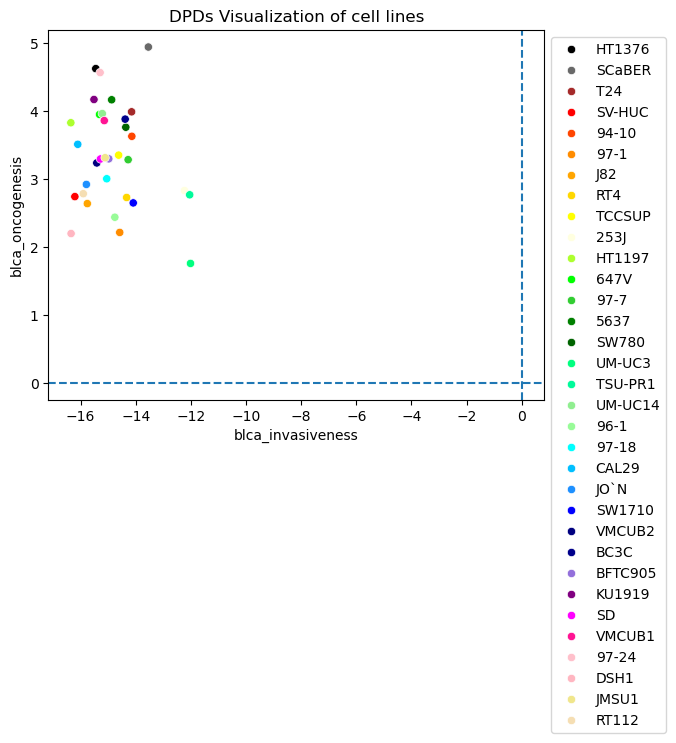

In [19]:
colors = [
    'black', 'dimgray', 'brown', 'red', 'orangered', 'darkorange', 'orange', 'gold', 'yellow',
    'lightyellow', 'greenyellow', 'lime', 'limegreen', 'green', 'darkgreen', 'springgreen', 
    'mediumspringgreen', 'lightgreen', 'palegreen', 'cyan', 'deepskyblue', 'dodgerblue', 
    'blue', 'navy', 'darkblue', 'mediumpurple', 'purple', 'magenta', 'deeppink', 'pink', 
    'lightpink', 'khaki', 'wheat'
]

# Create a Seaborn palette
custom_palette = sns.color_palette(colors)
sns.scatterplot(DPD_df,x='blca_invasiveness',y='blca_oncogenesis',hue=DPD_df.index,palette=custom_palette)
plt.axvline(x=0,linestyle='--')
plt.axhline(y=0,linestyle='--')
plt.title("DPDs Visualization of cell lines")
plt.legend(bbox_to_anchor=(1,0, 0,1))

#plt.xlabel('DPD_N/MIBC')
#plt.savefig("/Users/lidiayung/Downloads/DPD_sct_lincs_healthy_onc.png",dpi=300)


In [20]:
len(DPD_df)

33

In [24]:
cell_line_ids=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']

DPD_cell_lines= DPD_df.loc[cell_line_ids]
DPD_cell_lines['cell_line_name']=['CAL29','BC3C','J82','RT4','SW780','T24','HT1376']


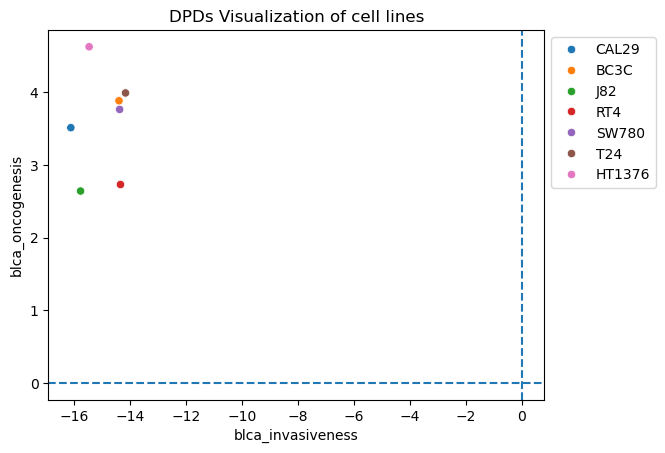

In [27]:
sns.scatterplot(DPD_cell_lines,x='blca_invasiveness',y='blca_oncogenesis',hue='cell_line_name')
plt.axvline(x=0,linestyle='--')
plt.axhline(y=0,linestyle='--')
plt.title("DPDs Visualization of cell lines")
plt.legend(bbox_to_anchor=(1,0, 0,1))

#plt.xlabel('DPD_N/MIBC')
#plt.savefig("/Users/lidiayung/Downloads/DPD_sct_lincs_healthy_onc.png",dpi=300)
